In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

C:\Users\user\AppData\Local\Temp\ipykernel_5888\2891900888.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-12-12,10.200226,10.264502,10.134468,10.250163,279046027
2005-12-13,10.320867,10.333474,10.176247,10.197507,327775997
2005-12-14,10.357205,10.376242,10.271423,10.309741,266210095
2005-12-15,10.445956,10.460542,10.296394,10.360916,242738446
2005-12-16,10.633837,10.691932,10.450900,10.514928,655668429


In [ ]:
google_data.shape()

(5030, 5)

In [6]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,57.676375,58.276438,57.053042,57.647207,8.974131e+07
std,56.767399,57.400921,56.109824,56.724256,1.128252e+08
min,6.364233,6.659158,6.113560,6.489570,1.584340e+05
25%,14.348696,14.474343,14.218972,14.345359,2.524650e+07
50%,34.708927,35.055577,34.354709,34.703714,4.212405e+07
75%,86.748117,87.896947,86.107434,86.804334,1.110196e+08
max,323.428986,328.455705,319.771365,326.586898,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2005-12-12 to 2025-12-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5030 non-null   float64
 1   (High, GOOG)    5030 non-null   float64
 2   (Low, GOOG)     5030 non-null   float64
 3   (Open, GOOG)    5030 non-null   float64
 4   (Volume, GOOG)  5030 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [9]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

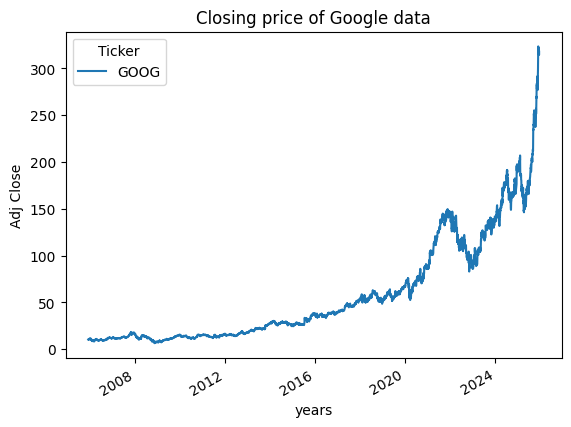

In [13]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [14]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [15]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

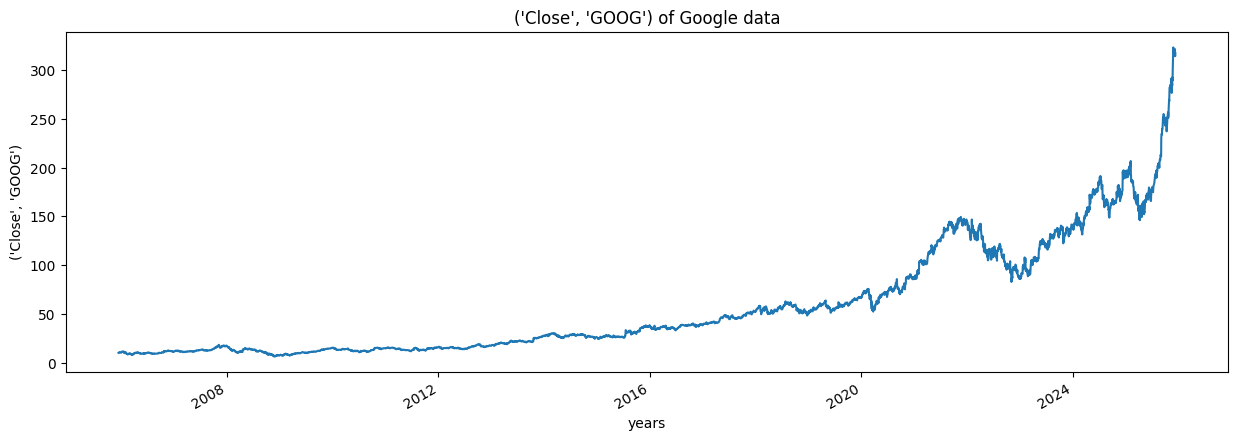

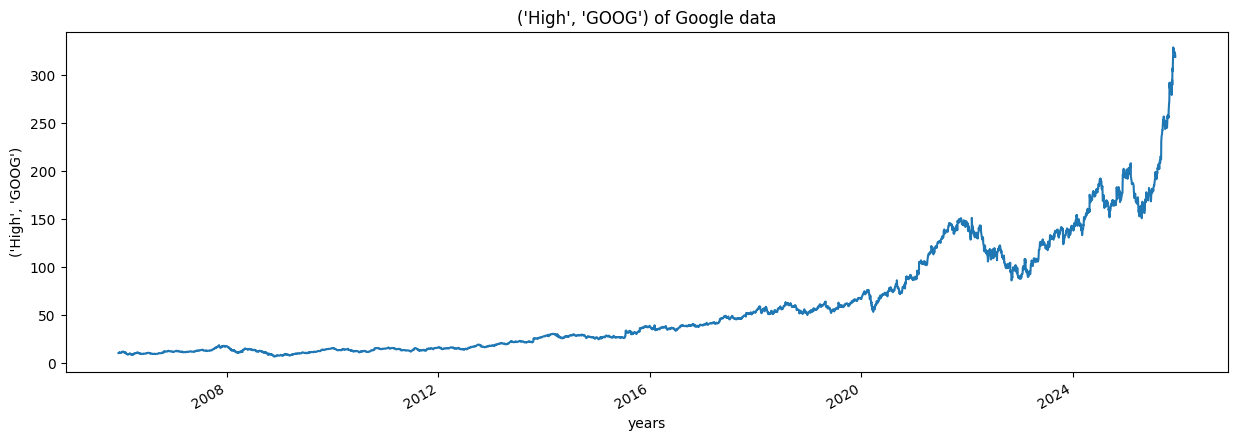

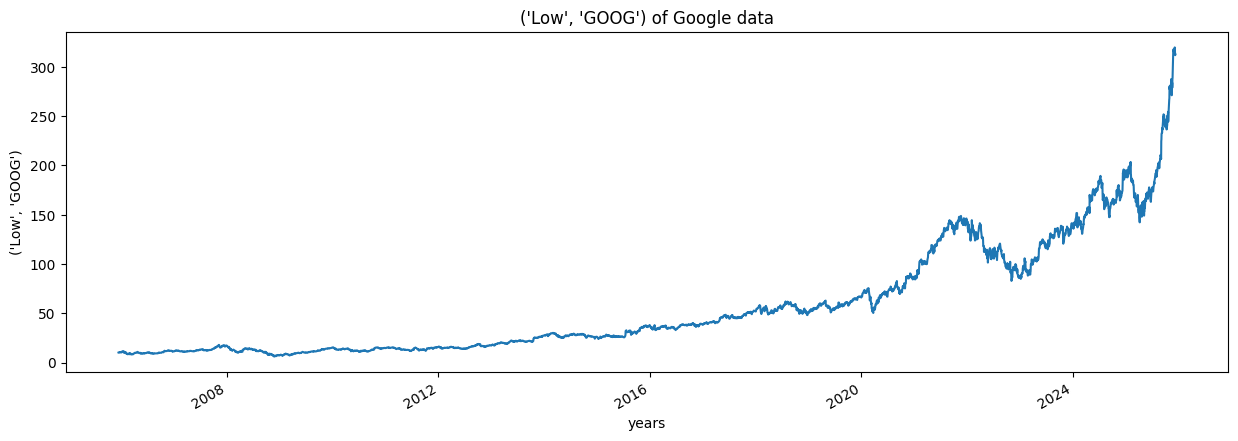

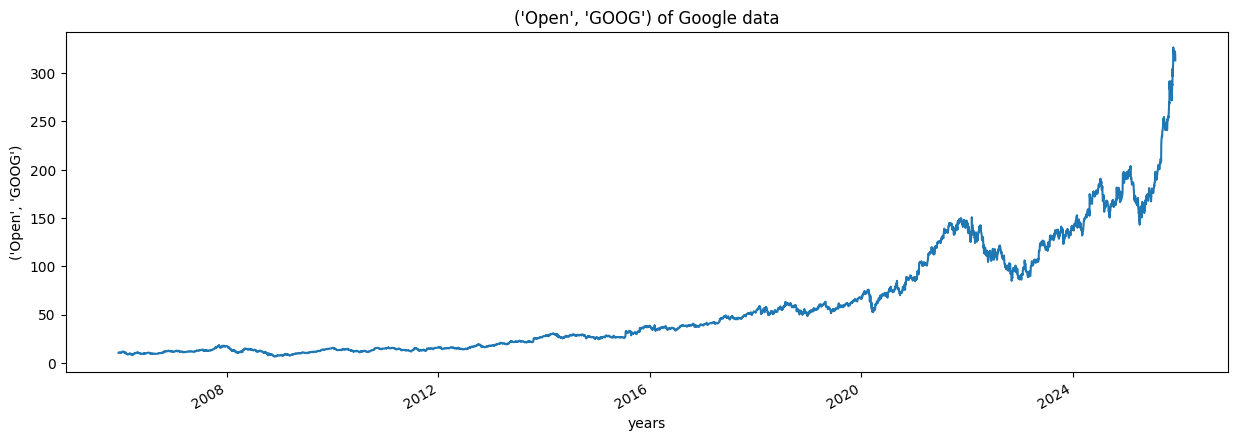

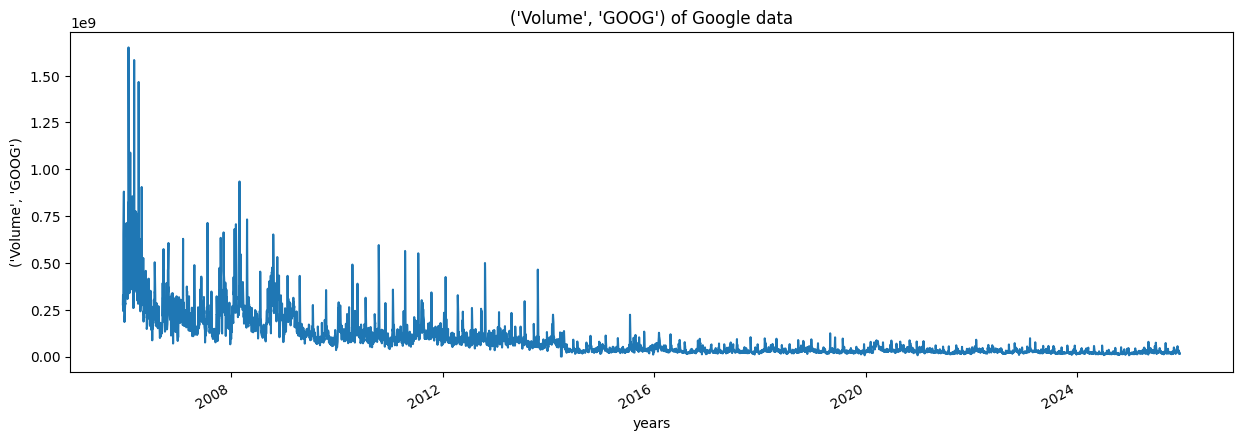

In [16]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 14
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [22]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [23]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-12-01          NaN
2006-12-04          NaN
2006-12-05          NaN
2006-12-06          NaN
2006-12-07    10.095489
Name: MA_for_250_days, dtype: float64

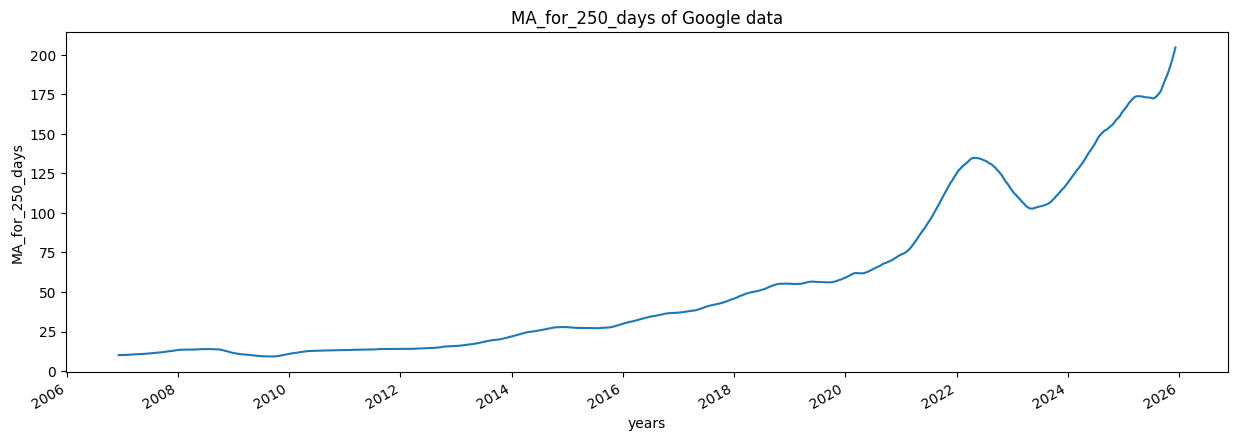

In [24]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

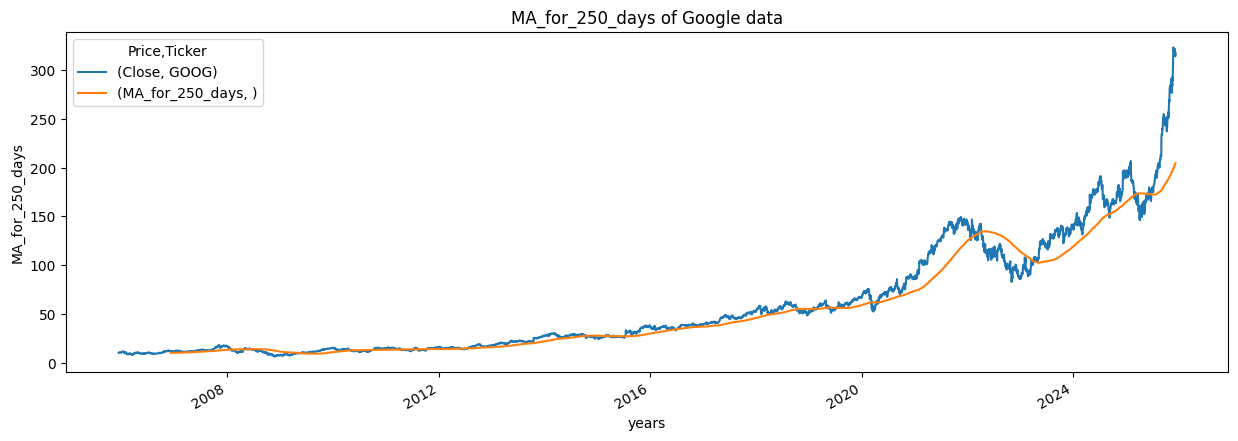

In [25]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

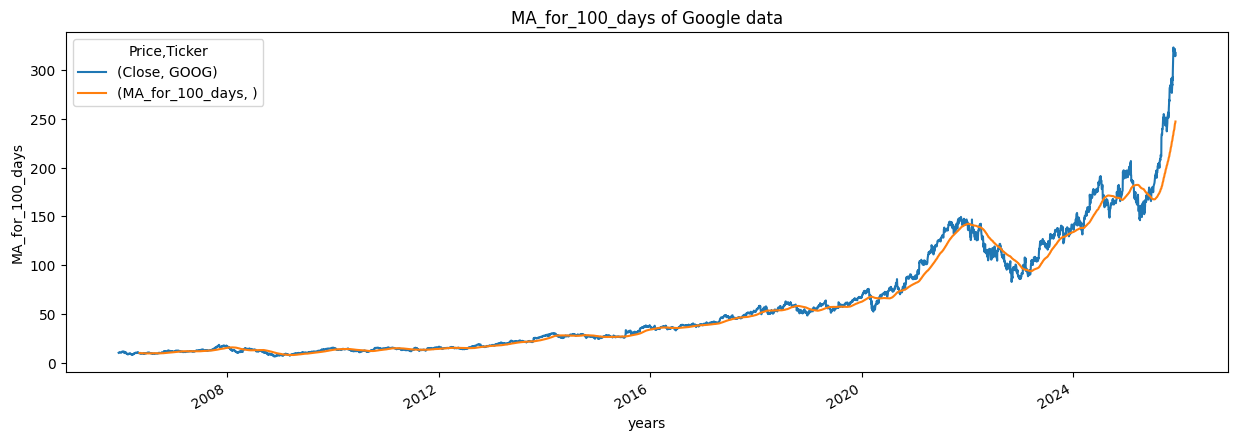

In [26]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

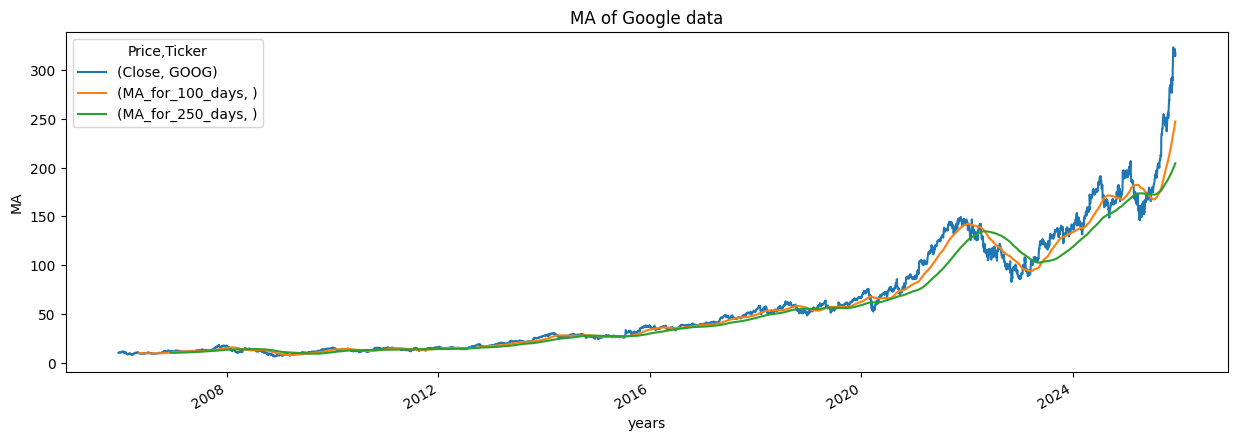

In [27]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [28]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-12-12,10.200226,NaN
2005-12-13,10.320867,0.011827
2005-12-14,10.357205,0.003521
2005-12-15,10.445956,0.008569
2005-12-16,10.633837,0.017986


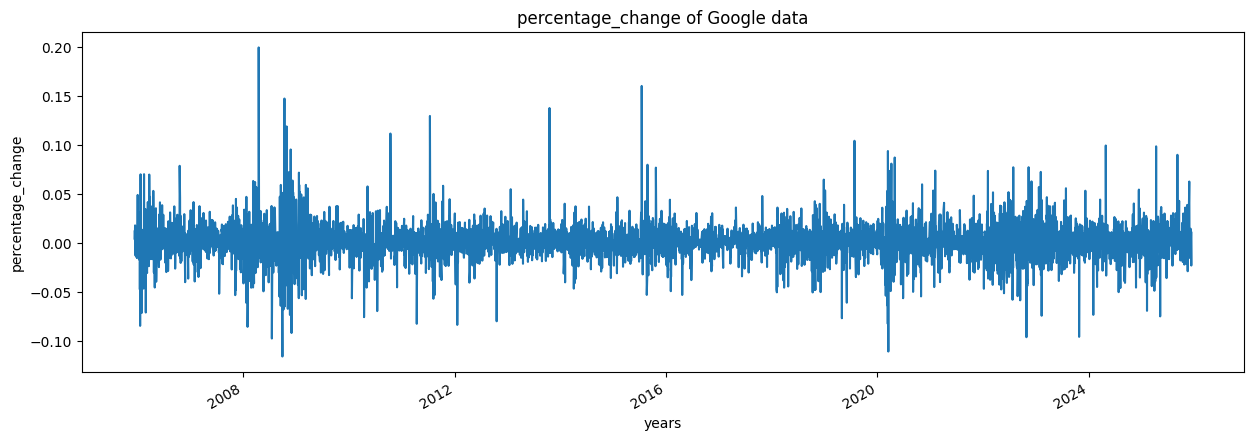

In [29]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [30]:
Adj_close_price = google_data[['Close']]

In [31]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([323.4289856]), array([6.36423349]))

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01209845],
       [0.01247894],
       [0.01259355],
       ...,
       [0.99511453],
       [0.97168095],
       [0.98208888]], shape=(5030, 1))

In [33]:
len(scaled_data)

5030

In [34]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [35]:
x_data[0],y_data[0]

(array([[0.01209845],
        [0.01247894],
        [0.01259355],
        [0.01287347],
        [0.01346603],
        [0.0130333 ],
        [0.01343406],
        [0.01316819],
        [0.01361339],
        [0.01352685],
        [0.01303642],
        [0.01319626],
        [0.01268634],
        [0.01227389],
        [0.01386212],
        [0.01464258],
        [0.0151104 ],
        [0.01623471],
        [0.01633139],
        [0.01655438],
        [0.01670018],
        [0.01607644],
        [0.01628072],
        [0.01634777],
        [0.01461686],
        [0.01395724],
        [0.01107316],
        [0.01325941],
        [0.01447027],
        [0.01368824],
        [0.01378726],
        [0.01372645],
        [0.0132064 ],
        [0.01366173],
        [0.01125405],
        [0.0108065 ],
        [0.00967673],
        [0.00995352],
        [0.00861402],
        [0.00870446],
        [0.0079006 ],
        [0.0082    ],
        [0.00688155],
        [0.00669598],
        [0.00662269],
        [0

In [36]:

int(len(x_data)*0.7)

3451

In [37]:
4908-100-int(len(x_data)*0.7)

1357

In [38]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1479, 100, 1)
(1479, 1)


In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 221s 62ms/step - loss: 5.7322e-05
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 209s 61ms/step - loss: 2.9707e-05


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [46]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step


In [47]:
predictions

array([[0.22242081],
       [0.22291851],
       [0.22157472],
       ...,
       [0.97961926],
       [0.98617023],
       [0.979918  ]], shape=(1479, 1), dtype=float32)

In [48]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 76.88603],
       [ 77.04383],
       [ 76.61777],
       ...,
       [316.96698],
       [319.04407],
       [317.06168]], shape=(1479, 1), dtype=float32)

In [49]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 73.77914429],
       [ 72.78957367],
       [ 71.16127014],
       ...,
       [321.87997437],
       [314.45001221],
       [317.75      ]], shape=(1479, 1))

In [50]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [51]:
rmse

np.float64(7.110973551927109)

In [53]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-01-23,73.779144,76.886032
2020-01-24,72.789574,77.043831
2020-01-27,71.161270,76.617767
2020-01-28,72.087341,75.518051
2020-01-29,72.388573,75.237892


<Figure size 640x480 with 0 Axes>

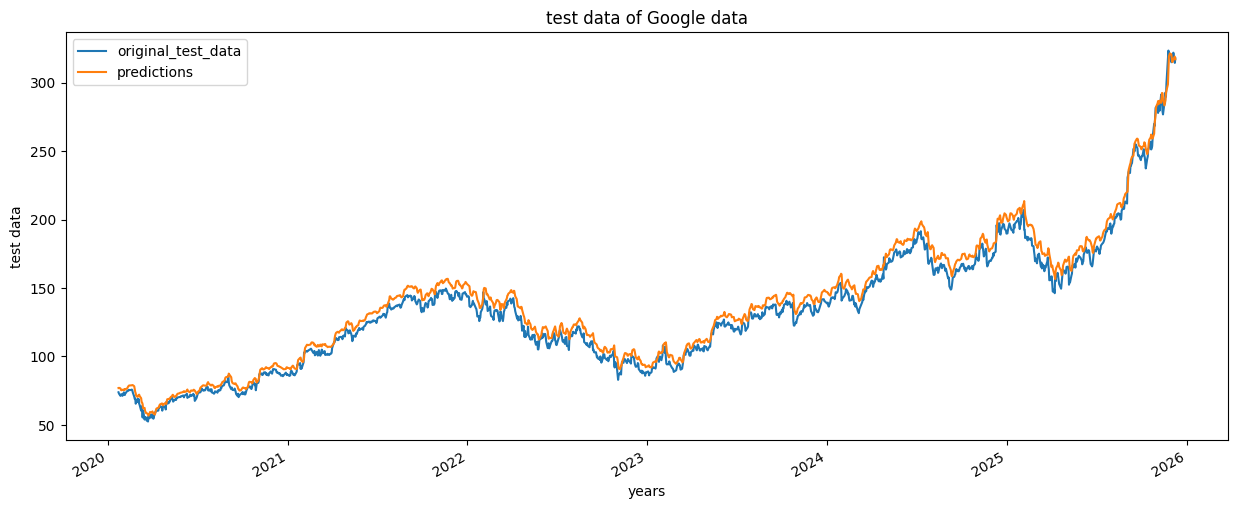

In [54]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

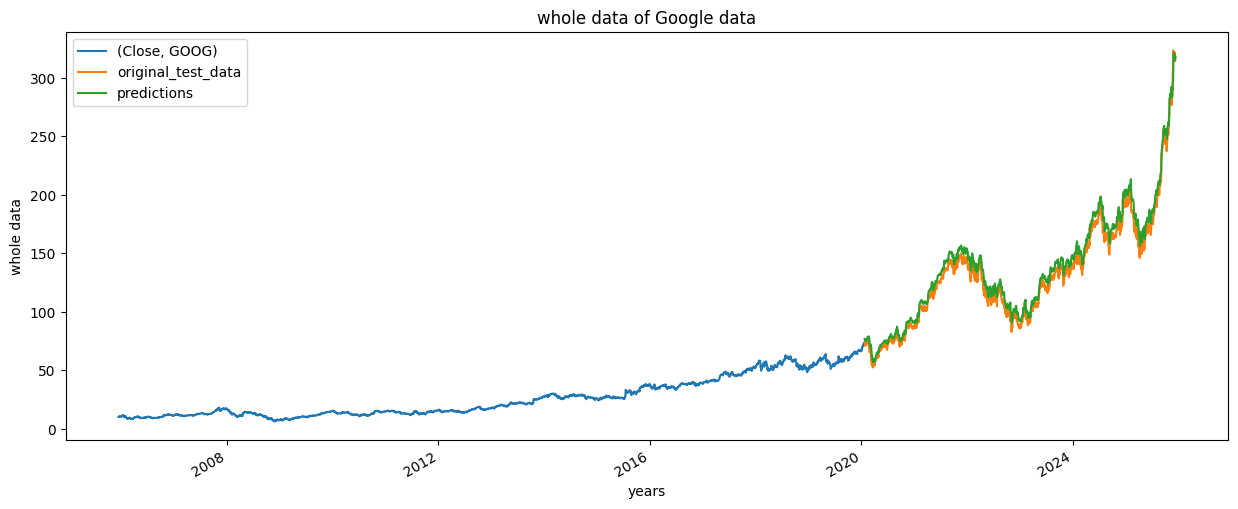

In [55]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [56]:
model.save("Latest_stock_price_model.keras")